In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

ImportError: No module named nifti

# Open data

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/862_863/Boxes/Low/863ss2onc250_862ss2onc250zx2cregcregc862_863U10sMpsfkfMMLow30Smith0_4_60TS.mat


In [5]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(5957, 30)

In [6]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)
Ua2=sio.loadmat(filename)
DTroi=Ua2['TSzmapo']
DTroi.shape

/media/sophie2/862_863/Boxes/Low/863ss2onc250_862ss2onc250zx2cregcregc862_863U10sMpsfkfMMLow30Smith0_4_60TSzmap.mat


(5957, 30)

In [7]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie2/862_863/Boxes/Low/863ss2onc250_862ss2onc250zx2cregcregc862_863U10sMpsfkfMMLow30Smith0_4_60ICpadded.nii


In [8]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(174, 93, 11, 30)

In [10]:
data1=np.zeros((174,93,1,30))
               

In [11]:
data=np.concatenate((data,data1),axis=2)

In [12]:
S=data.shape
S

(174, 93, 12, 30)

In [13]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/862_863/862ForAlignement/862ss2TimeFluoOn.mat


In [14]:
Ua

{'TSo': array([[-0.01858685,  0.00195296,  0.01398978, ...,  0.00721693,
         -0.0160851 ,  0.01774573],
        [ 0.00778375,  0.01179458,  0.02136934, ...,  0.01798587,
         -0.01695283,  0.00921507],
        [ 0.06905792,  0.04806521, -0.02070072, ...,  0.00303197,
          0.01394139,  0.00059618],
        ..., 
        [-0.01701372,  0.00591607,  0.02629149, ..., -0.00296685,
          0.00642783,  0.01458765],
        [-0.01784181,  0.00902222,  0.02407922, ...,  0.00032739,
          0.00892234,  0.01445044],
        [-0.00154865,  0.01366196,  0.01789009, ...,  0.00062435,
          0.00715075,  0.01223326]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Sep  2 21:54:18 2016',
 '__version__': '1.0'}

In [15]:
Ua=sio.loadmat(filename)
Time_fluo862=np.squeeze(Ua['TimeFluoOn'])

In [16]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie2/862_863/863foralignement/863ss2TimeFluoOn.mat


In [17]:
Ua2=sio.loadmat(filename)
Time_fluo863=np.squeeze(Ua2['TimeFluoOn'])
Time_fluo863.shape

(3292,)

In [18]:
Time_fluoICA=Time_fluo862[range(251,Time_fluo862.shape[0])]

In [19]:
A=Time_fluo862[range(251,Time_fluo862.shape[0])]
B=Time_fluo863[range(251,Time_fluo863.shape[0])]+np.max(Time_fluo862)
Time_fluoICA=np.concatenate([A,B])

In [20]:
Time_fluoICA.shape

(5957,)

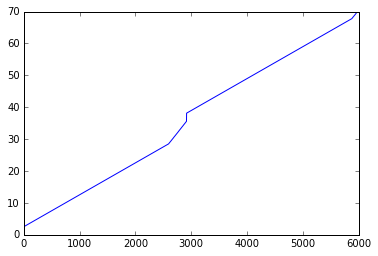

In [21]:
plt.plot(np.squeeze(Time_fluoICA))

Z-score

In [22]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [23]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [24]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [25]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/home/sophie/Downloads/862ResizedMapsfullpsftrimmed.nii


In [27]:
filenameM='/home/sophie/Downloads/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

IOError: [Errno 2] No such file or directory: '/home/sophie/Download/RegionList'

# Average in masks to sort components by brain region

In [20]:
Dmaps.shape

(176, 96, 11, 218)

In [186]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [187]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

ValueError: operands could not be broadcast together with shapes (165,83,12) (176,96,11) 

In [29]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

In [30]:
J

[73]

LO_R
LOP_R
34
LO_R
48
LO_R
112
LO_R
LOP_R
ME_R
115
LO_R
LOP_R
122
LO_R
LOP_R
128
LO_R
LOP_R
143
LO_R
BU_R
MB_PED_L
167
LO_R
CAN_R
BU_L
187
LO_R
PB
212
lobula


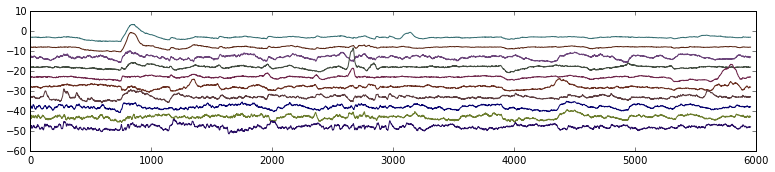

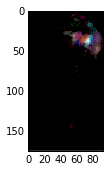

NO
161
nodulus


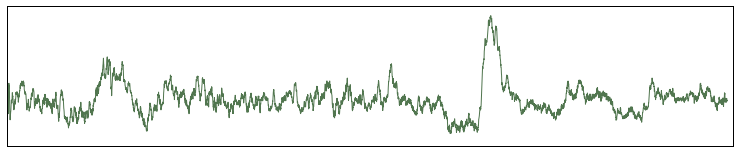

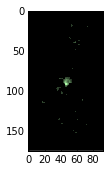

BU_R
BU_L
ATL_L
ME_L
27
BU_R
152
AME_R
LO_R
BU_R
ME_R
170
BU_R
AMMC_R
ATL_L
178
BU_R
PB
LO_L
ME_L
183
NO
BU_R
ME_L
211
bulb


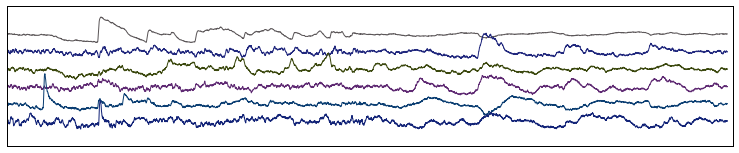

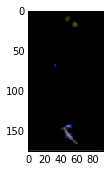

PB
ATL_L
43
PB
ATL_L
65
PB
ATL_L
66
PB
ATL_R
ATL_L
74
PB
ATL_R
ATL_L
191
PB
203
PB
ATL_R
ICL_L
ATL_L
219
protocerebral bridge


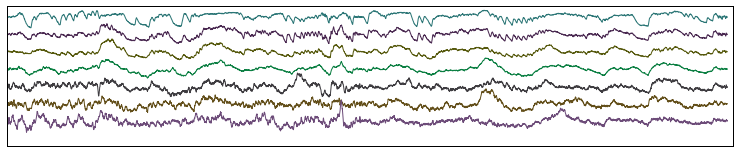

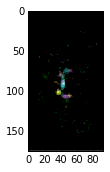

LH_R
MB_CA_R
0
LH_R
GA_R
3
LH_R
5
LH_R
42
LH_R
MB_CA_R
44
LH_R
PLP_R
45
LH_R
92
lateral horn


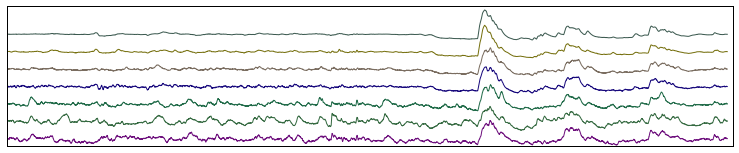

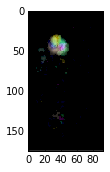

LAL_R
AL_R
202
lateral accessory lobe


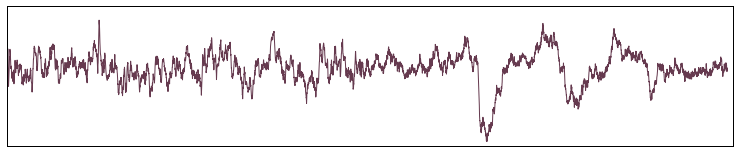

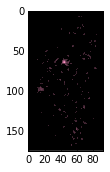

AMMC_R
IVLP_R
10
antennal mechanosensory and motor center


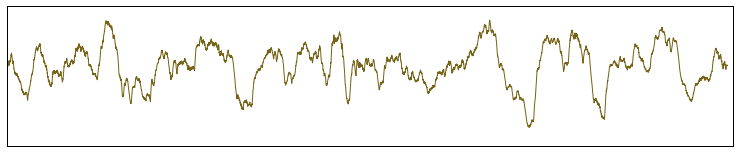

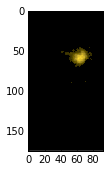

PB
ATL_R
55
antler


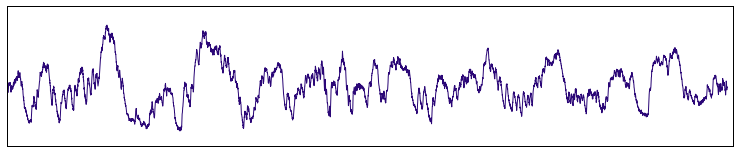

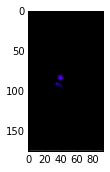

MB_PED_R
MB_VL_R
SIP_R
24
pedunculus of adult mushroom body


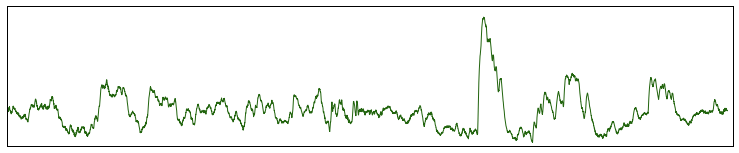

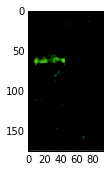

CRE_R
MB_PED_R
MB_ML_R
7
MB_VL_R
MB_ML_R
SIP_R
15
MB_VL_R
MB_ML_R
MB_ML_L
38
CRE_R
MB_ML_R
83
medial lobe of adult mushroom body


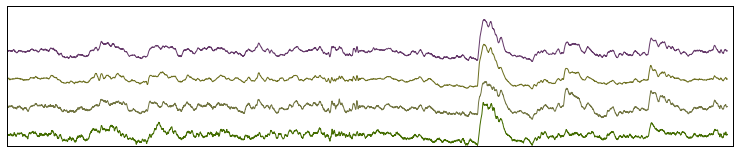

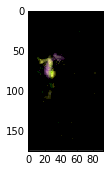

LO_R
LOP_R
29
LO_R
LOP_R
68
LO_R
LOP_R
141
lobula plate


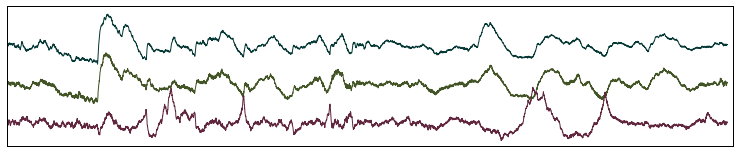

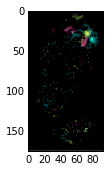

PB
EB
ICL_L
ATL_L
72
EB
MB_ML_L
75
EB
85
EB
119
EB
124
EB
206
ellipsoid body


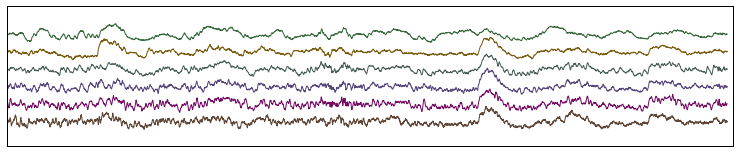

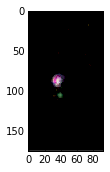

AL_R
AL_L
11
LAL_R
AL_R
AL_L
16
LH_R
LAL_R
AL_R
AVLP_R
41
LAL_R
AL_R
AL_L
51
LAL_R
AL_R
52
LAL_R
VES_R
AL_R
53
adult antennal lobe


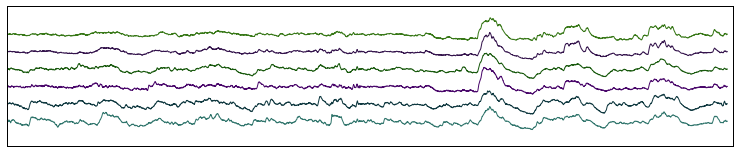

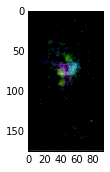

LOP_R
ME_R
12
ME_R
14
LO_R
ME_R
40
ME_R
46
LO_R
LOP_R
ME_R
56
BU_R
EB
ME_R
BU_L
78
LO_R
LOP_R
ME_R
ATL_L
100
LOP_R
ME_R
103
ME_R
ATL_L
108
LO_R
ME_R
164
LO_R
LOP_R
ME_R
168
BU_R
LOP_R
ME_R
BU_L
172
medulla


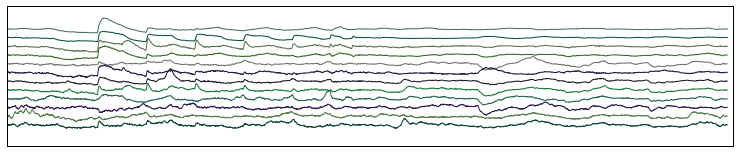

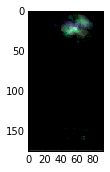

FB
13
EB
FB
23
EB
FB
54
FB
BU_L
88
ATL_R
EB
FB
GA_R
134
fan-shaped body


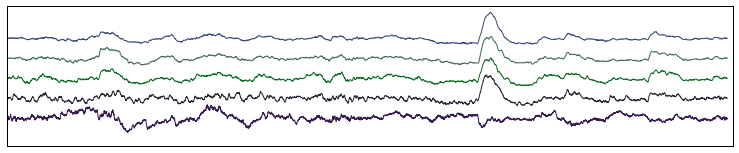

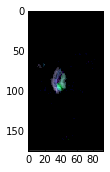

SLP_R
MB_CA_R
SCL_R
193
ATL_R
SLP_R
SMP_R
232
superior lateral protocerebrum


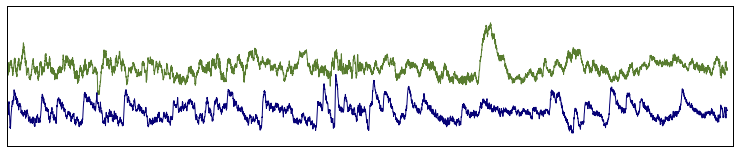

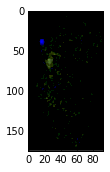

MB_VL_R
SMP_R
22
SMP_R
147
superior medial protocerebrum


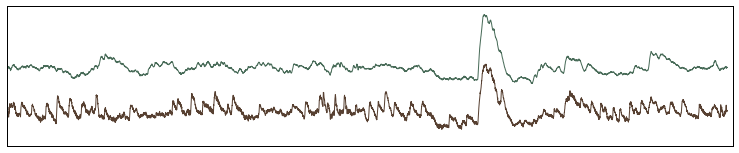

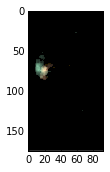

SAD
AMMC_R
IVLP_R
IPS_R
37
IVLP_R
PLP_R
IPS_R
70
wedge


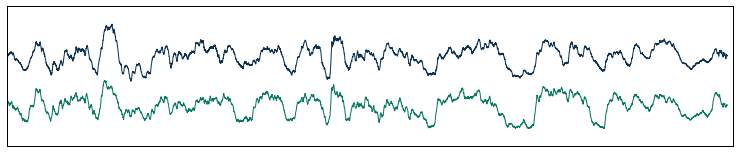

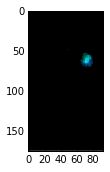

PLP_R
80
MB_ML_R
PLP_R
MB_CA_R
SCL_R
82
CAN_R
PLP_R
PRW
133
PLP_R
199
posterior lateral protocerebrum


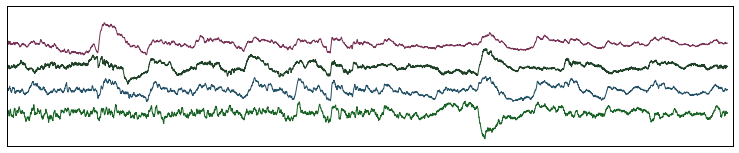

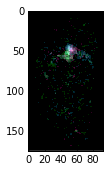

MB_CA_R
2
MB_PED_R
MB_VL_R
MB_CA_R
20
MB_CA_R
30
ICL_R
MB_CA_R
60
MB_CA_R
SCL_R
98
MB_CA_R
113
MB_CA_R
185
LH_R
MB_CA_R
GA_R
210
calyx of adult mushroom body


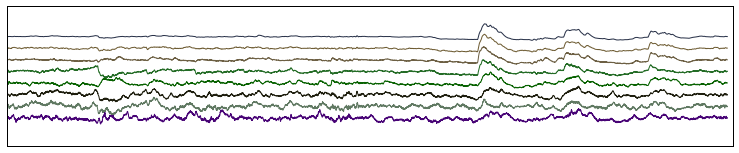

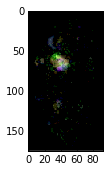

IB_R
SPS_R
6
superior posterior slope


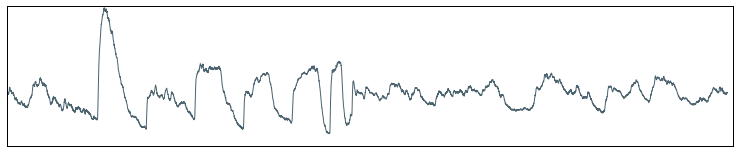

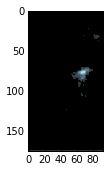

SPS_R
IPS_R
IPS_L
31
inferior posterior slope


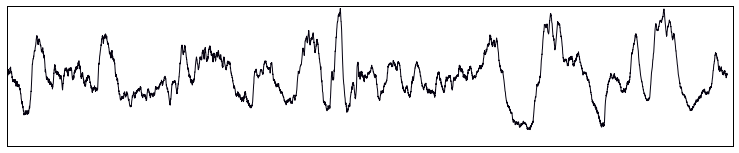

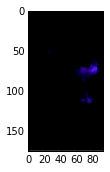

LAL_R
AL_R
GA_R
39
gall


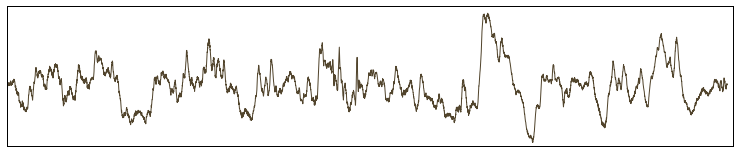

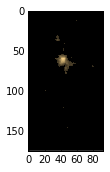

LO_L
ME_L
63
LO_L
LOP_L
97
LO_L
104
LO_L
ME_L
117
CAN_R
LO_L
118
LO_L
BU_L
ME_L
130
LO_L
ME_L
173
LO_L
177
lobula


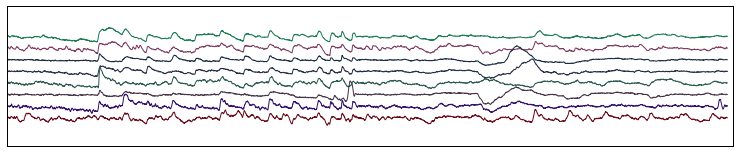

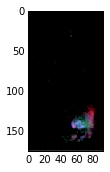

BU_L
204
BU_L
223
BU_L
ME_L
225
bulb


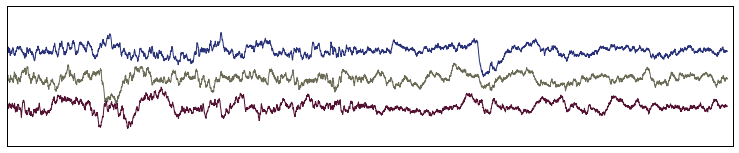

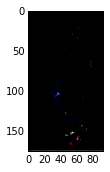

LH_L
125
LH_L
149
LH_L
AL_L
181
LH_L
ATL_L
218
lateral horn


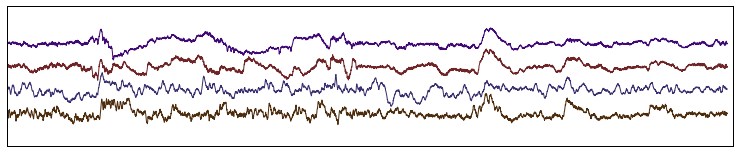

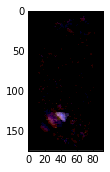

CAN_R
IB_R
IB_L
21
inferior bridge


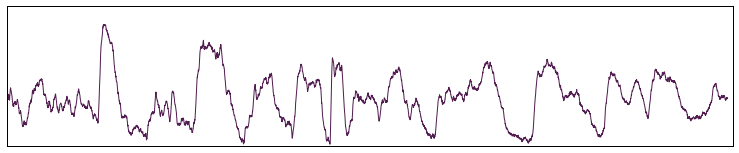

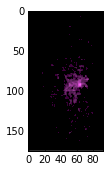

PB
ATL_L
154
antler


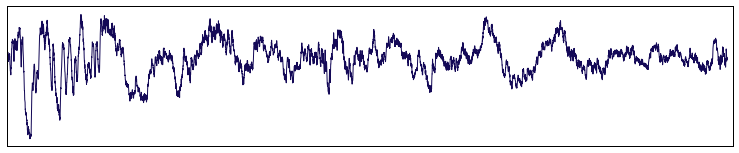

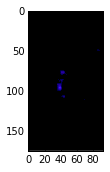

MB_VL_L
35
MB_PED_L
MB_VL_L
MB_ML_L
81
vertical lobe of adult mushroom body


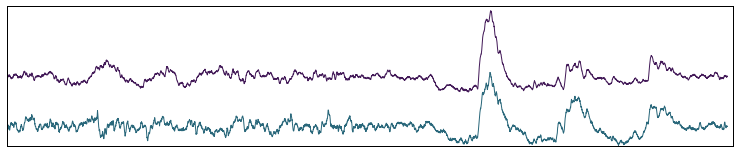

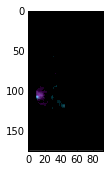

MB_PED_L
MB_ML_L
9
MB_VL_L
MB_ML_L
SIP_L
AOTU_L
17
MB_ML_L
67
MB_ML_L
93
medial lobe of adult mushroom body


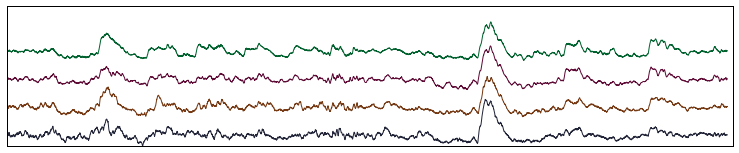

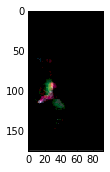

LAL_L
AL_L
28
CRE_R
AL_R
AL_L
32
VES_L
AL_L
33
adult antennal lobe


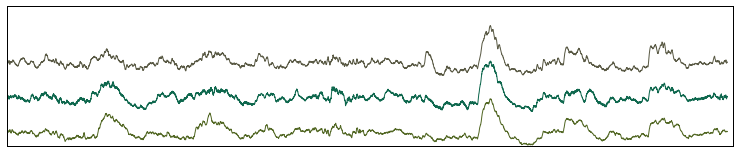

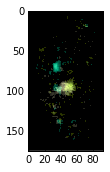

BU_R
BU_L
ME_L
57
LO_L
ME_L
59
BU_R
LOP_L
ME_L
61
LO_L
ME_L
71
ME_L
MB_CA_L
95
LO_L
ME_L
101
LO_L
ME_L
110
LO_L
ME_L
111
ME_L
114
BU_R
ME_L
120
LO_L
ME_L
121
LO_L
ME_L
140
LO_L
ME_L
158
MB_PED_R
ME_L
188
GA_R
ME_L
190
PB
LO_L
ME_L
194
medulla


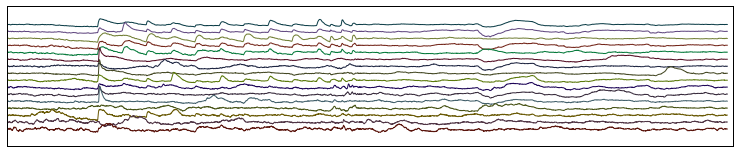

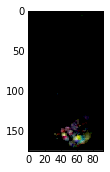

SMP_L
69
SMP_L
131
superior medial protocerebrum


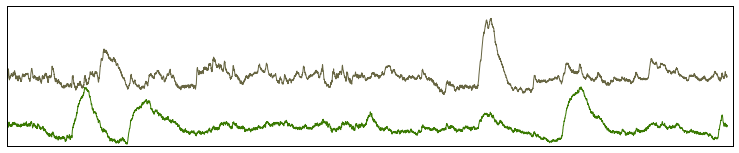

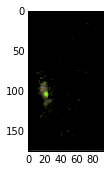

AVLP_L
PVLP_L
PLP_L
62
posterior ventrolateral protocerebrum


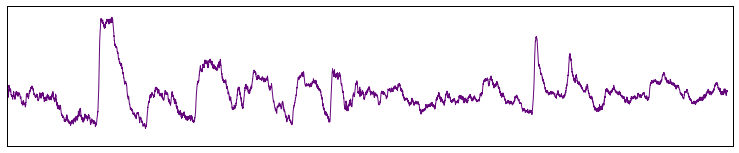

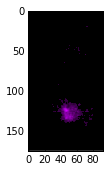

IVLP_L
90
wedge


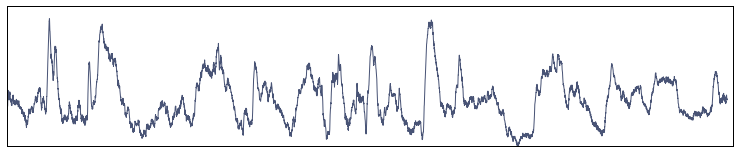

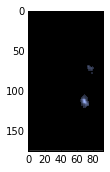

LH_L
SLP_L
SIP_L
MB_CA_L
4
MB_CA_L
SCL_L
50
MB_CA_L
175
LH_L
MB_CA_L
216
MB_CA_L
SCL_L
238
calyx of adult mushroom body


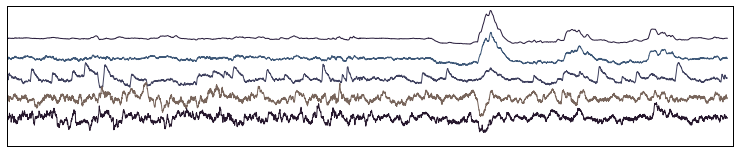

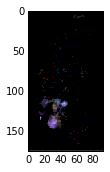

SPS_L
36
superior posterior slope


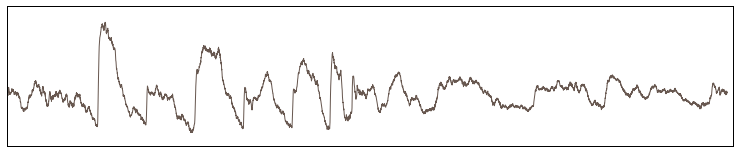

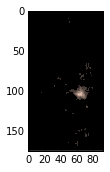

VES_L
SPS_L
IPS_L
25
BU_L
IPS_L
195
inferior posterior slope


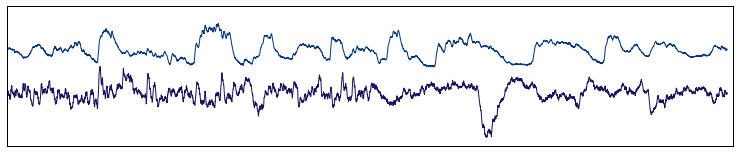

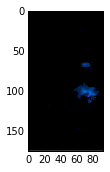

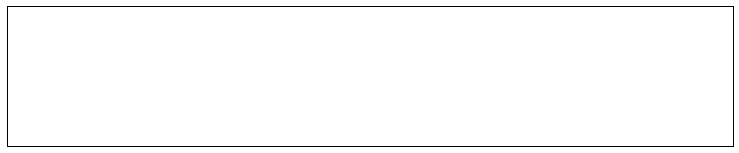

In [31]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


In [32]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=NiftiImage(filenamet)
Dtemp=np.squeeze(nimt.data.T)
Dtemp.shape

/home/sophie/Desktop/Registration/862_863/Template4alignement2anatomypsf.nii


(174, 93, 12)

# Last pruning by hand

In [16]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

In [17]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

NameError: name 'Dtemp' is not defined

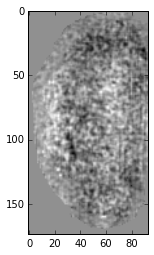

In [18]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [19]:
S

(174, 93, 12, 199)

In [20]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

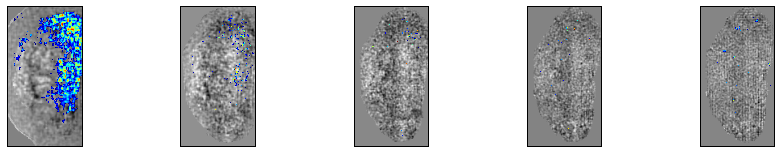

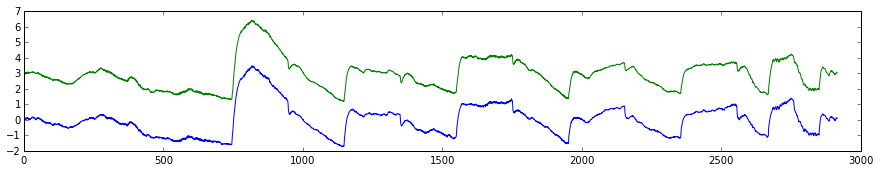

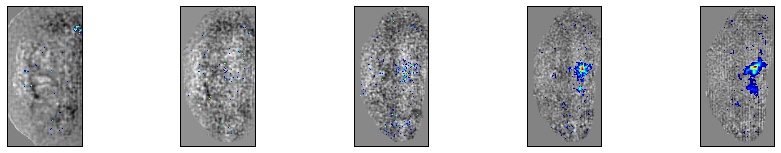

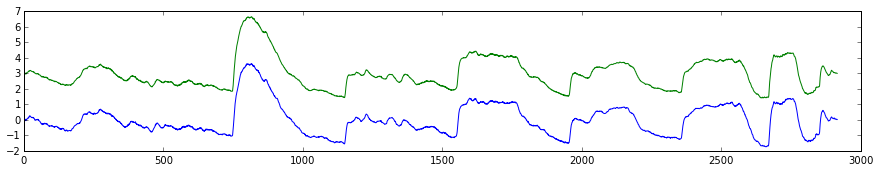

In [ ]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    #if CompMainName[j] != '':
        print(j)
        print(CompMainName[j])
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    plt.plot(DT[:,j]/np.sqrt(np.var(DT[:,j])))
    plt.plot(DTroi[:,j]/np.sqrt(np.var(DTroi[:,j]))+3)               

    plt.show()
    a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [53]:
DT.shape

(5957, 249)

In [54]:
Dmaps.shape

(174, 93, 12, 249)

In [57]:
fn=open('/home/sophie/Desktop/862863GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

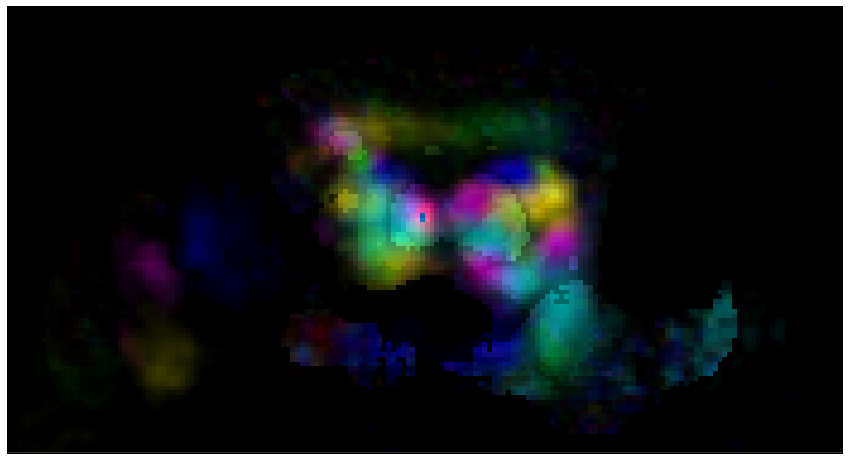

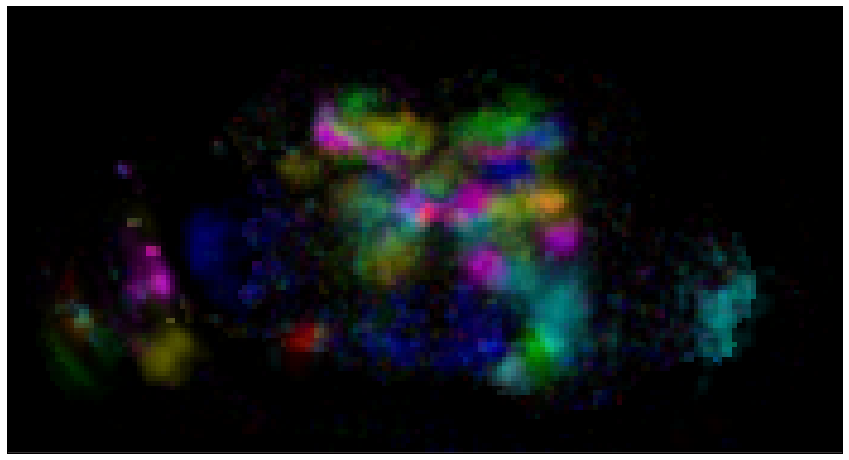

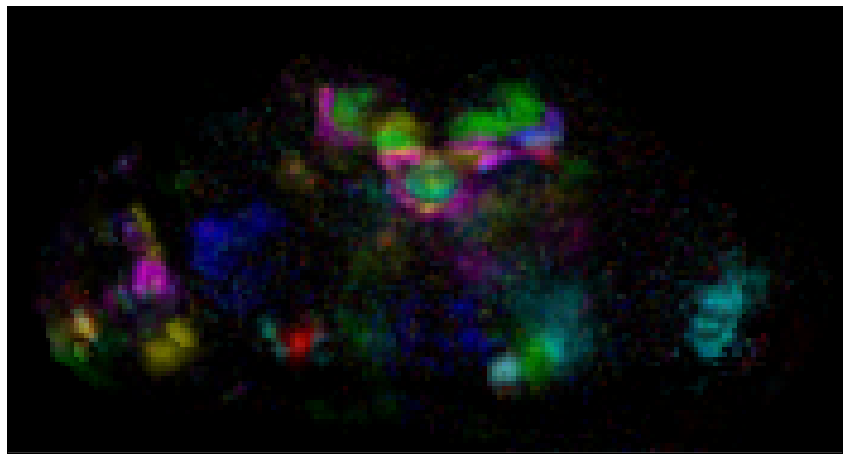

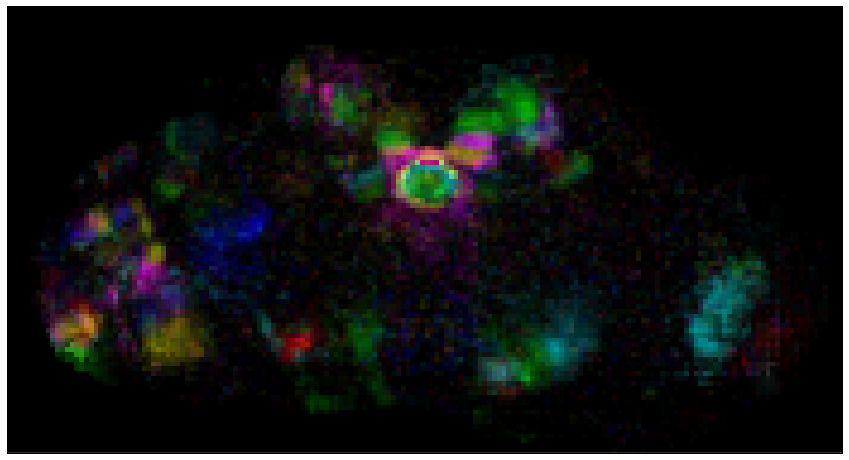

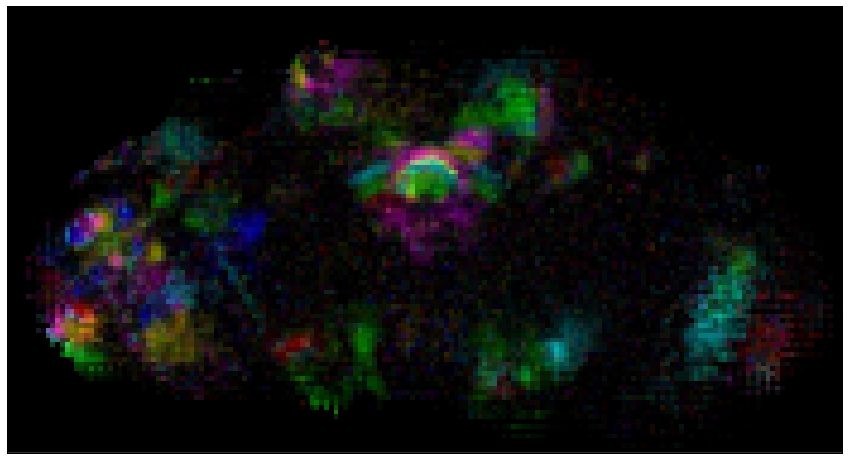

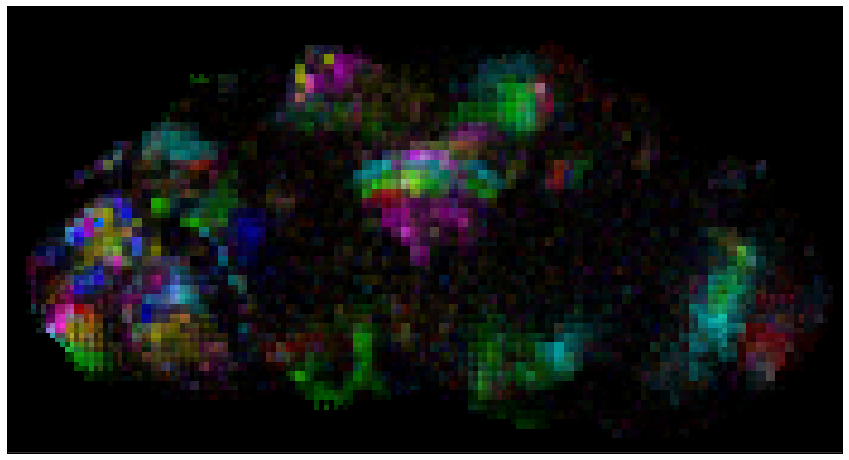

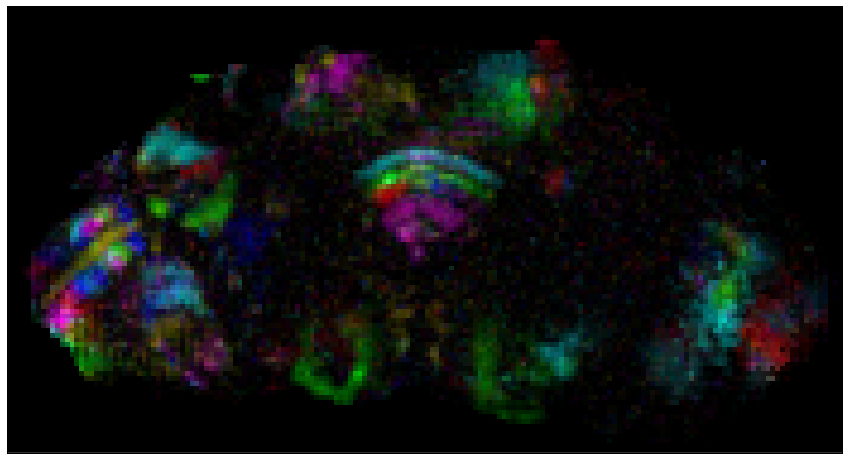

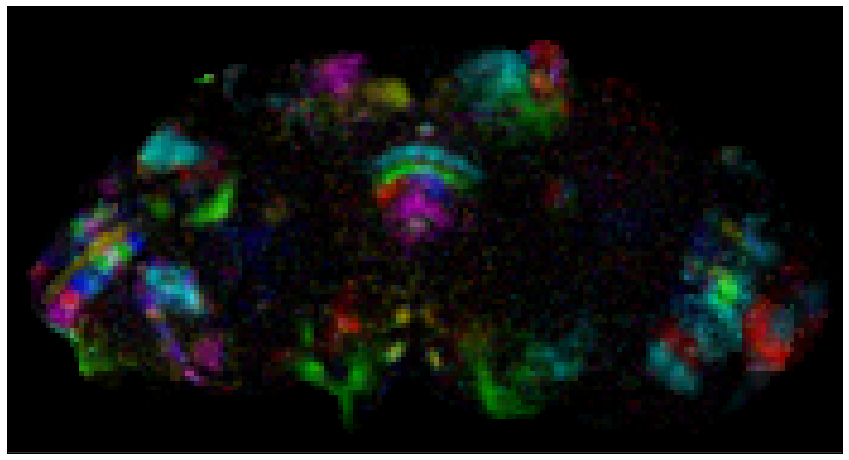

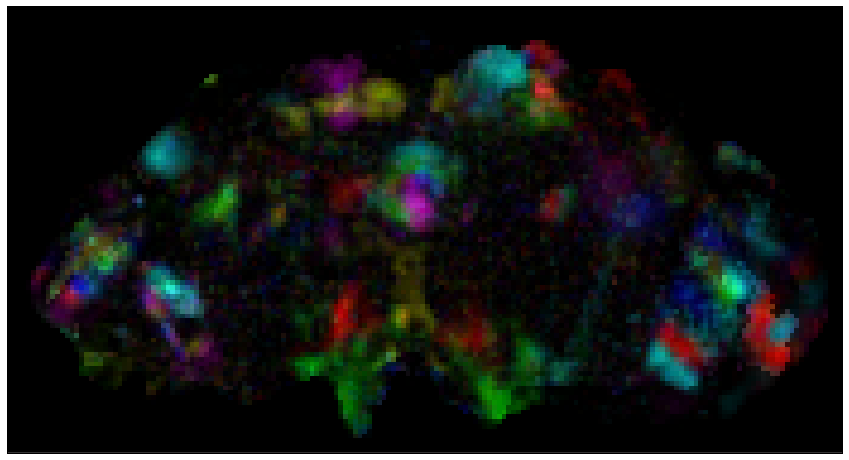

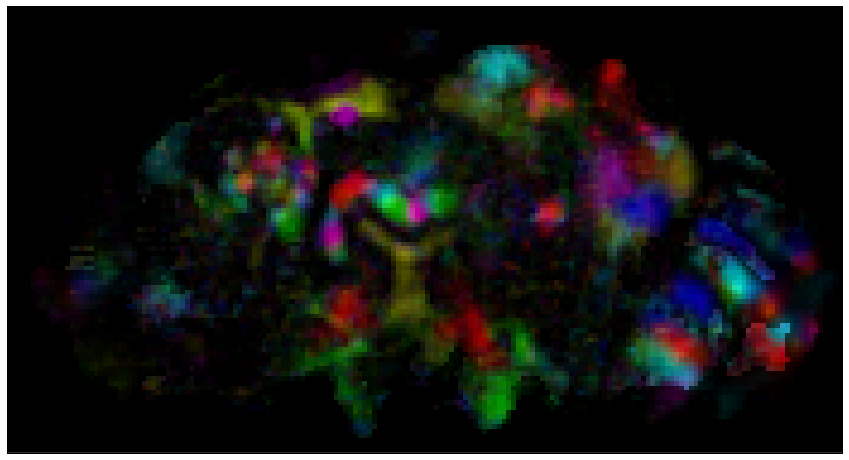

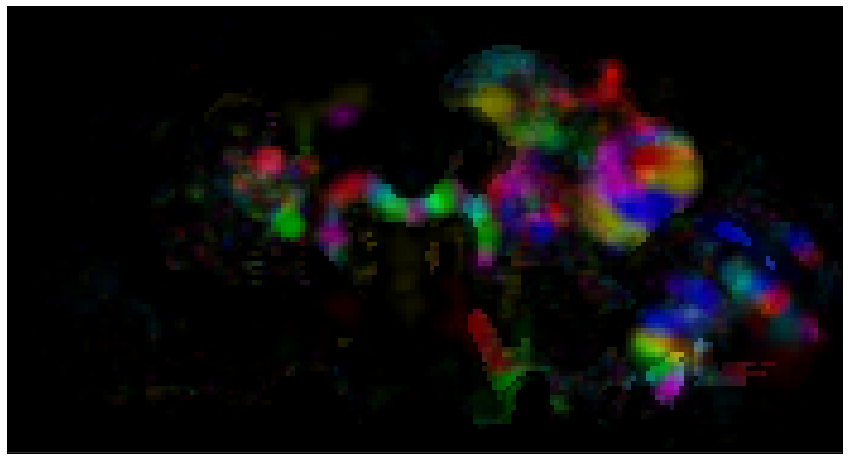

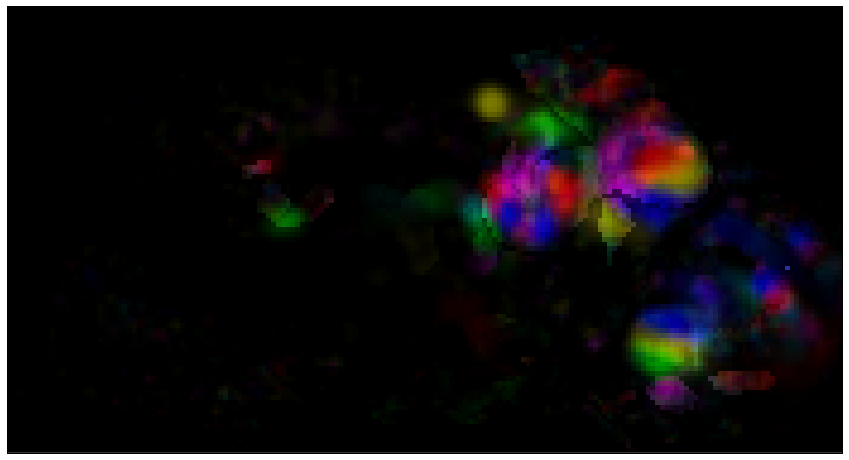

In [164]:
pylab.rcParams['figure.figsize'] = (20, 8)
Amap=np.zeros((S[0],S[1],S[2],3))
AllMaps=np.zeros((S[0],S[1],S[2],3))
Dmv=np.zeros((S[0],S[1],S[2]))
C=np.zeros((S[3],3))
i=0
for j in range(S[3]): 
    if Good_ICs[j]:
        C[j,:]=C1[j%6][:]
        Dmv[:,:,:]=data[:,:,:,j]/np.sqrt(np.var(np.reshape(data[:,:,:,j],S[0]*S[1]*S[2])))
        Dmv=Dmv-2
        Dmv[Dmv<0]=0

        for k in range(3):
            M=np.max(np.squeeze(np.reshape(Dmv[:,:,:],S[0]*S[1]*S[2])))
            Amap[:,:,:,k]=0.6*Dmv[:,:,:]*C[j,k]/M
        AllMaps=AllMaps+Amap   
    
for i in range(S[2]):
    Rotated=ndimage.rotate(AllMaps[:,:,i,:],-90)
    plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    fig1=plt.gcf()
    name='/home/sophie/862863stack'+str(i)+'.png'
    fig1.savefig(name)
    plt.show() 
#plt.tight_layout(pad=0,w_pad=0,h_pad=0)

In [58]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [59]:
G=Good_ICs.tolist();

In [60]:
len(Good_ICs)

249

In [61]:
G.count(1)

119

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [62]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [63]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [64]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [65]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [66]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [67]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [68]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [69]:
NewOrder=np.argsort(SmallRegion)

In [70]:
SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  6,  6,  6,  8,  8,  8,  8,  8,  9,  9, 11, 12, 16,
       16, 16, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 22, 22, 23, 24, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 31, 32, 32, 32, 34,
       34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 37, 40, 41, 41, 43,
       44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51,
       51, 51, 51, 51, 51, 52, 53, 54, 54, 54, 54, 54, 54, 54, 57, 58, 59,
       59, 59, 59, 59, 61

# Plot all components together

In [80]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [81]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [82]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [83]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

In [87]:
np.max(np.max(np.max(Final_map[:,:,:,])))

1.372540583995207

IndexError: index 5 is out of bounds for axis 2 with size 5

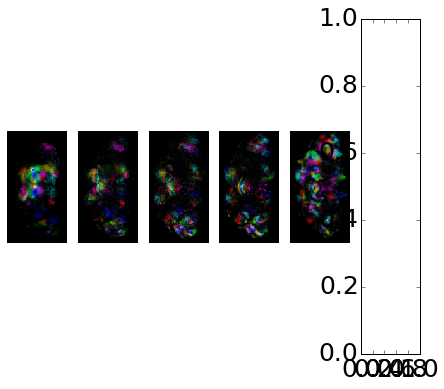

In [135]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    #Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/50
    #Df=Df/(np.max(np.max(Df)))
    Df[:,:,:,i]=Final_map[:,:,:,i]
    #Df=Df/(np.max(np.max(Df)))
    
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)
  

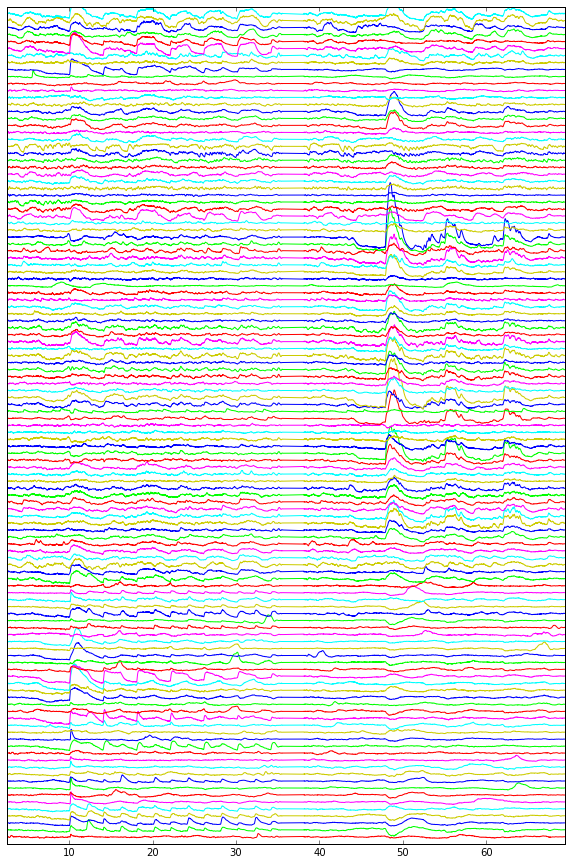

In [76]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [92]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['ME_L']
1
['ME_L']
2
['ME_L']
3
['ME_L']
4
['ME_L']
5
['ME_L']
6
['ME_L']
7
['ME_L']
8
['ME_L']
9
['ME_L']
10
['ME_L']
11
['ME_L']
12
['ME_L']
13
['ME_L']
14
['ME_L']
15
['ME_L']
16
['ME_R']
17
['ME_R']
18
['ME_R']
19
['ME_R']
20
['ME_R']
21
['ME_R']
22
['ME_R']
23
['ME_R']
24
['ME_R']
25
['LO_R']
26
['LO_R']
27
['LO_R']
28
['LO_R']
29
['LO_R']
30
['LO_L']
31
['LO_L']
32
['LO_L']
33
['LO_L']
34
['LO_L']
35
['LO_L']
36
['LOP_R']
37
['LOP_R']
38
['PVLP_L']
39
['IVLP_R']
40
['IVLP_R']
41
['IVLP_R']
42
['IVLP_L']
43
['AL_R']
44
['AL_R']
45
['AL_R']
46
['AL_R']
47
['AL_R']
48
['AL_R']
49
['AL_L']
50
['AL_L']
51
['AL_L']
52
['AL_L']
53
['AL_L']
54
['MB_CA_R']
55
['MB_CA_R']
56
['MB_CA_R']
57
['MB_CA_R']
58
['MB_CA_R']
59
['MB_CA_L']
60
['MB_CA_L']
61
['MB_CA_L']
62
['MB_PED_R']
63
['MB_VL_R']
64
['MB_VL_L']
65
['MB_VL_L']
66
['MB_ML_R']
67
['MB_ML_R']
68
['MB_ML_R']
69
['MB_ML_R']
70
['MB_ML_R']
71
['MB_ML_L']
72
['MB_ML_L']
73
['MB_ML_L']
74
['MB_ML_L']
75
['MB_ML_L']
76
['SMP_R']
77
['S

In [96]:
Sets=[range(25),range(25,38),range(38,43),range(43,53),range(53,76),range(76,82),range(82,89),
      range(89,92),range(92,98),range(98,101),range(101,107),range(107,113),range(113,117),range(117,119)]

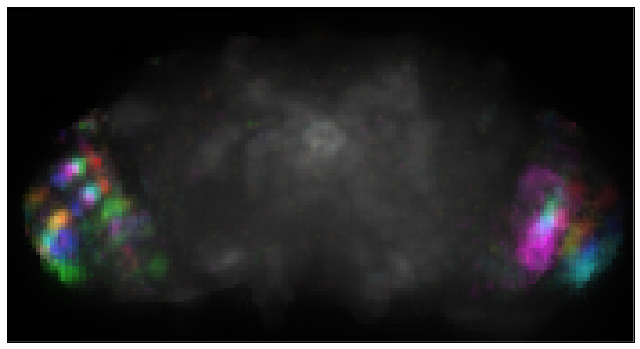

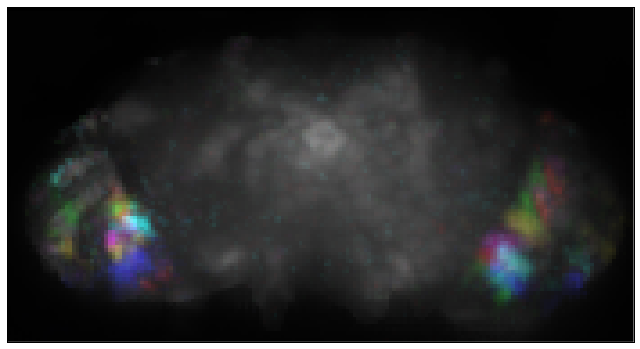

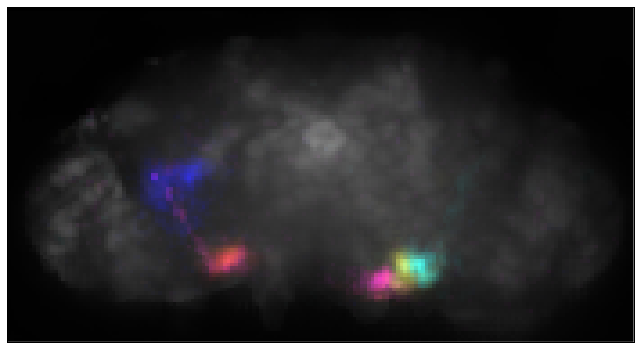

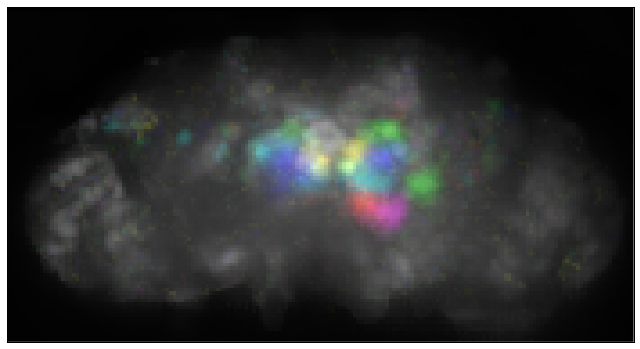

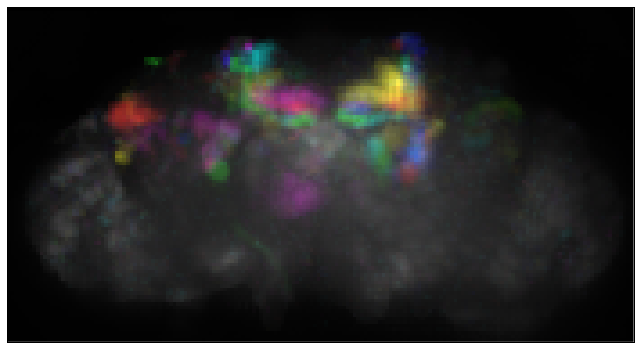

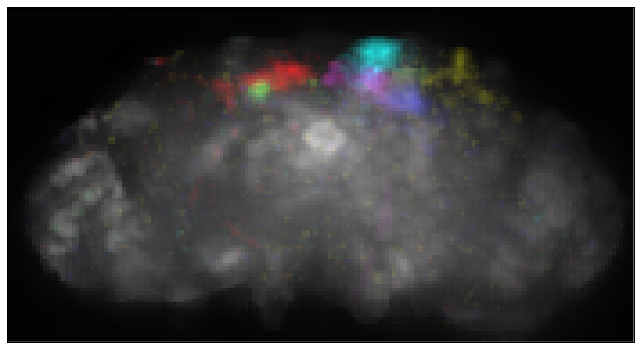

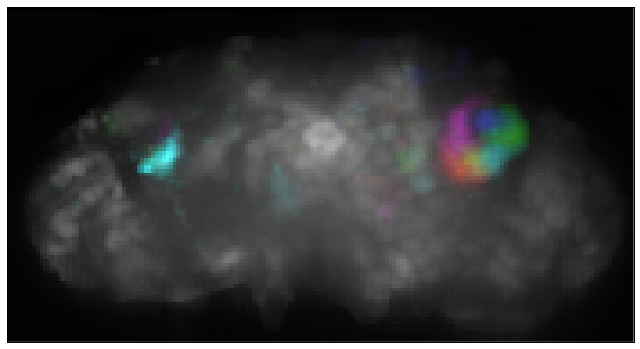

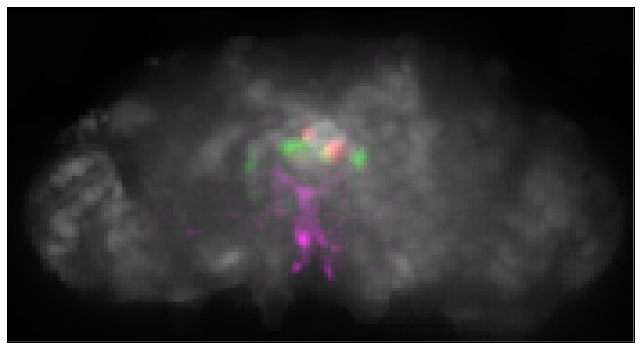

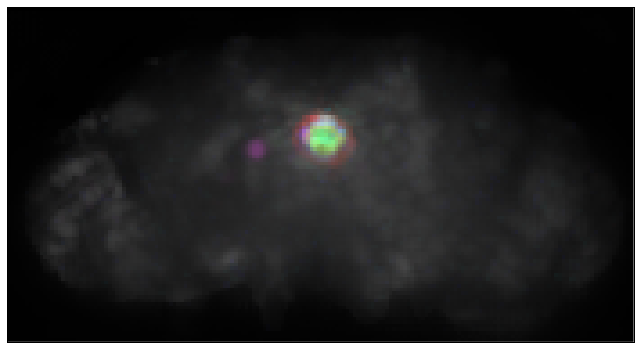

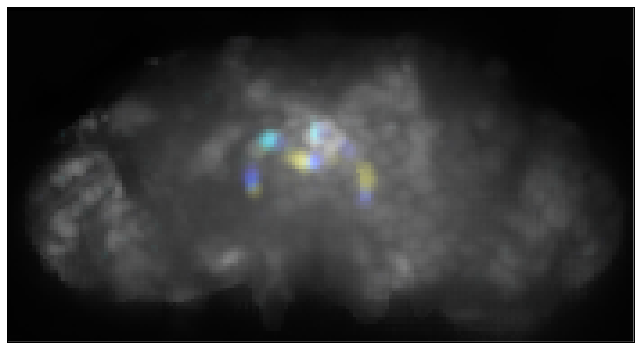

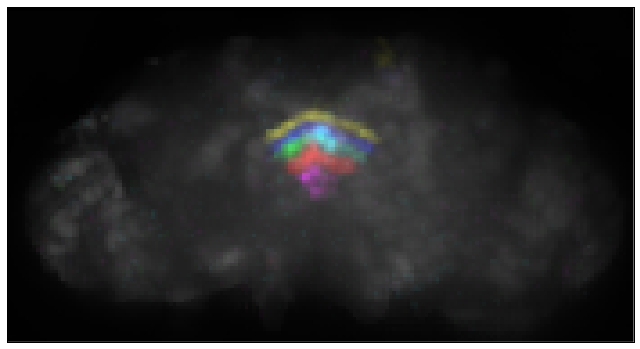

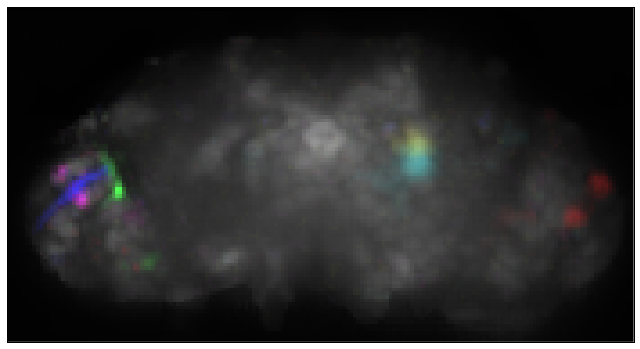

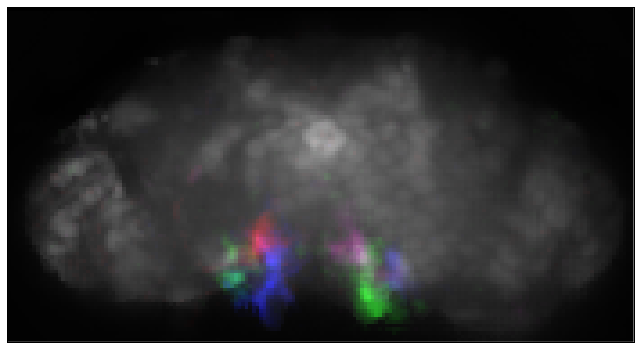

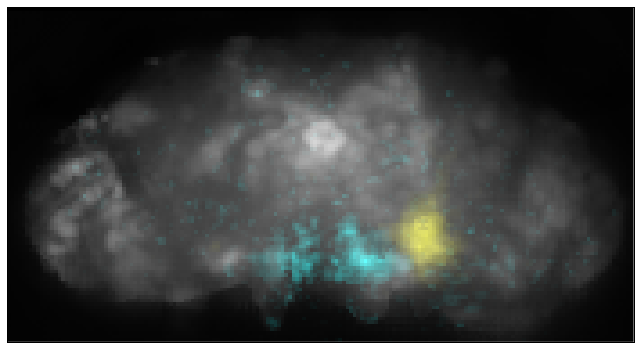

In [134]:
pylab.rcParams['figure.figsize'] = (12, 6)
SetId=np.zeros(1000)
n=0

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            SetId[n]=i
            n=n+1
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                for l in range(5):
                    M=np.max(np.squeeze(np.reshape(D2o[:,:,l,J[j]],S[0]*S[1],5)))
                    Fmaps3[:,:,l,k]=0.9*D2o[:,:,l,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        SetId[n]=i
        n=n+1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
            for l in range(5):
                M=np.max(np.squeeze(np.reshape(D2o[:,:,l,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,l,k]=0.9*D2o[:,:,l,J[j]]*C[j,k]/M 
        Final_map2=Final_map2+Fmaps2
        Final_map3=Final_map3+Fmaps3   
                
    Df=np.zeros([S[0],S[1],3]) 
    Df2=np.zeros([S[0],S[1],5,3]) 
    
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/300
        for m in range(5):
            Df2[:,:,m,l]=Final_map3[:,:,m,l]+np.mean(Dmean,2)/300
    MM=np.max(np.max(Df))
    
    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    
    fig1=plt.gcf()
    name='/home/sophie/862863image'+str(i)+'.png'
    fig1.savefig(name)
    plt.show()

In [120]:
Tstim=np.arange(0,np.max(Time_fluoICA),0.001)
Tstim2=Tstim-np.max(Time_fluo862)
Flashes=np.zeros(Tstim.shape[0])
Odor=np.zeros(Tstim.shape[0])
for i in range(Tstim.shape[0]):
    if (Tstim[i]>10 and Tstim[i]<12) or (Tstim[i]>14 and Tstim[i]<16) or (Tstim[i]>18 and Tstim[i]<20) or (Tstim[i]>22 and Tstim[i]<24)or (Tstim[i]>26 and Tstim[i]<28)or (Tstim[i]>30and Tstim[i]<32):
        Flashes[i]=1
    if (Tstim2[i]>12 and Tstim2[i]<14) or (Tstim2[i]>19 and Tstim2[i]<21) or (Tstim2[i]>26 and Tstim2[i]<28):
        Odor[i]=1
Flashes[Flashes==0]=np.nan
Odor[Odor==0]=np.nan 

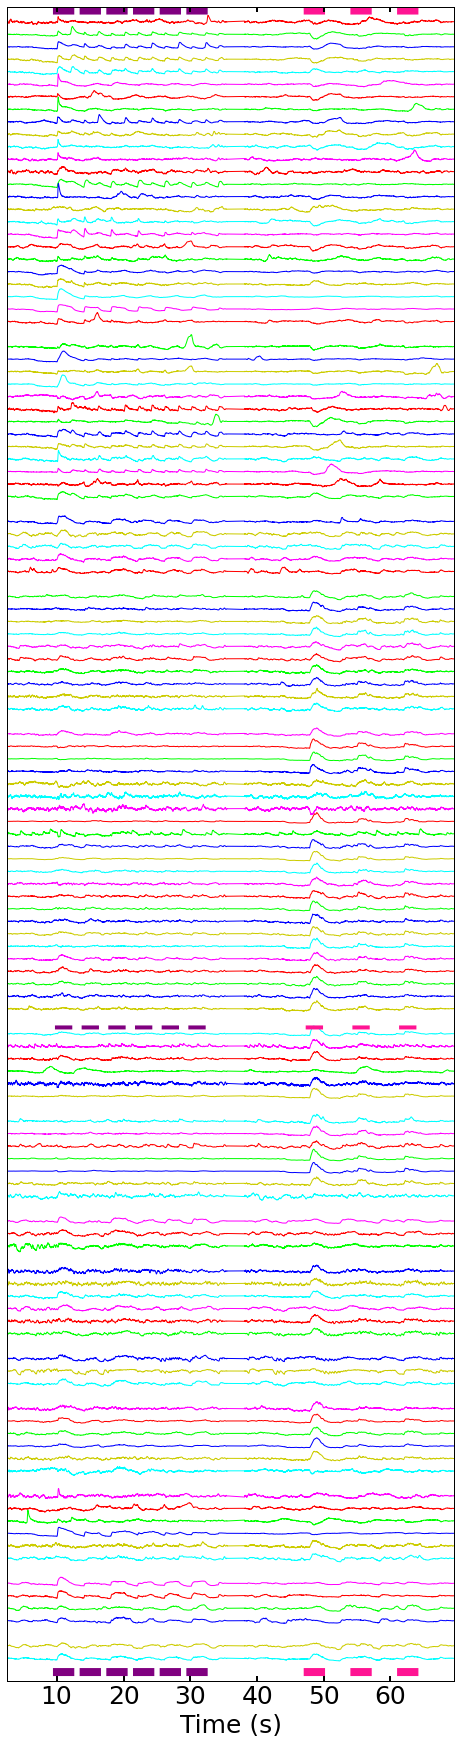

In [125]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        i=i+1

pylab.rcParams['figure.figsize'] = (8, 30)
h=10
i=0
plt.plot(Tstim,Flashes+8,linewidth=8,color='purple')
plt.plot(Tstim,Odor+8,linewidth=8,color='deeppink')

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]/np.sqrt(np.var(DTo[:,j]))-h*i-h*SetId[i]),color=C[j,:]) 
        i=i+1
        
plt.plot(Tstim,Flashes-h*i-h*np.max(SetId)-2,linewidth=8,color='purple')
plt.plot(Tstim,Odor-h*i-h*np.max(SetId)-2,linewidth=8,color='deeppink')

plt.plot(Tstim,Flashes-h*i-h*np.max(SetId)+514,linewidth=4,color='purple')
plt.plot(Tstim,Odor-h*i-h*np.max(SetId)+514,linewidth=4,color='deeppink')

plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-h*i-h*np.max(SetId)-8,12])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
frame1.axes.set_xlabel('Time (s)')
frame1.xaxis.set_tick_params(width=2,length=5)
matplotlib.rcParams.update({'font.size': 25})
plt.show()